# Gradient Descent

- Now you how the choice of $w$ and $b$ affects our model, and how we want to find the best
values of $w$ and $b$ to minimize the cost function, $J(w, b)$.
- Turns out there is an algorithm that can do just this, called **gradient descent**.
- Gradient descent is used all over in machine learning, just just for linear regression.  It's used
to train everything from basic things up to the most sophisticated neural networks and deep learning models.

## Overview

- We have some function $J(w, b)$ [for linear regression or any other model; in other models this might have more parameters]
- Want to find the parameters that minimize this function.
- Start with initial guesses for $w$ and $b$.
- Keep changing $w$ and $b$ to make $J(w, b)$ smaller.
- Stop when we can't seem to change $w$ and $b$ to make $J$ any smaller.  Now we're at a minimum!


## Intuition behind gradient descent

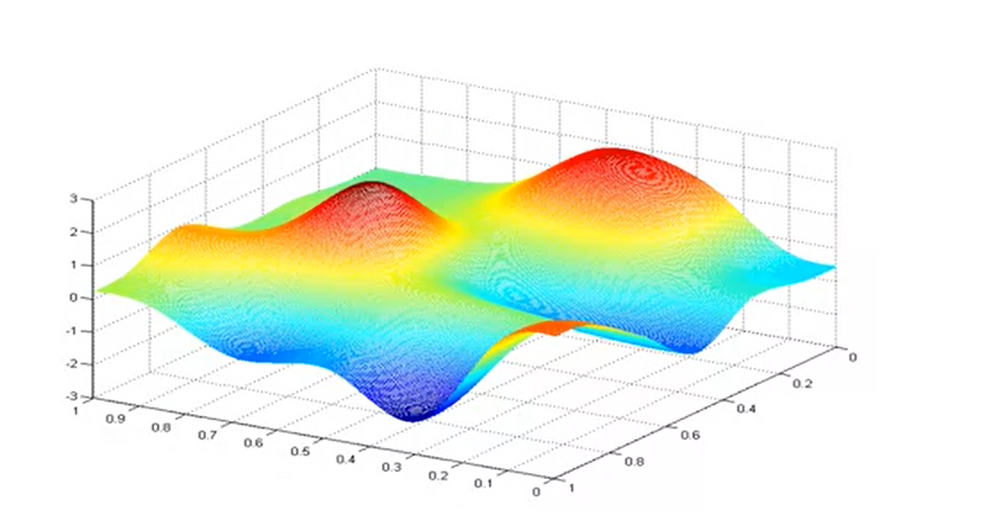

- Imagine you are standing at the top of one of the red hills on the graph above.  Your
goal is to get to the bottom of the hill as quickly as possible, and hopefully into one
of the deep blue valley areas (the lowest parts of the graph).
- (Note: because the graph above has multiple minimum points, it will not be a graph of $J$ that results
from linear regression with the squared error cost function.)

- What gradient descent does, is if you imagine yourself at the top of the hill, you spin 360 degrees
around and ask yourself, if I have the freedom to take a baby step in any direction, which direction should I step
in if I want to get to the bottom of the hill as quickly as possible.
- It turns out that that the best baby step is wherever the steepest descent is from your current direction.
- Now, from your new position, you repeat this process again, looking all around you and taking a baby step in whatever direction is the steepest descent from where you are, in order to get downhill the quickest.
- You continue doing this over and over until you find yourself at the bottom of the valley, where *any* baby step
would increase the height of your position (or at least not change it), rather than decreasing it.

- Depending on where you start, gradient descent might take you to different valleys with different lowest points.  These lowest points in the valleys are called **local minima** (singular: local minimum).

## Implementing Gradient Descent

Main update equations:

$$w = w - \alpha \cdot \frac{\partial}{\partial w} J(w, b)$$
$$b = b - \alpha \cdot \frac{\partial}{\partial b} J(w, b)$$

where $\alpha$ is the learning rate (a small positive number.)

and the entire gradient descent algorithm is:

**repeat until convergence** {
$$w = w - \alpha \cdot \frac{\partial}{\partial w} J(w, b)$$
$$b = b - \alpha \cdot \frac{\partial}{\partial b} J(w, b)$$
}

### Notes about these equations:

- These are **update equations**, which means that the values of $w$ and $b$ are changing over time.  We update
$w$ and $b$ each time through the loop above with new values.
- $\alpha$ (alpha) is called the **learning rate.**  It is a small positive number (can technically be any positive
number, but usually something like 0.1 or 0.01).  It controls how big the steps are you are taking downhill (how fast the algorithm learns).
- $\frac{\partial}{\partial w} J(w, b)$ is a **partial derivative**.  It tells us the direction we want
to take the baby step in.
- The update equations happen simultaneously.

## Learning rate $\alpha$

- The choice of $\alpha$, the learning rate, is a critical part of
making gradient descent work.  Choosing $\alpha$ poorly means the algorithm
might not work at all.
- If $\alpha$ is too small, gradient descent will work, but it will run more slowly than it has to.

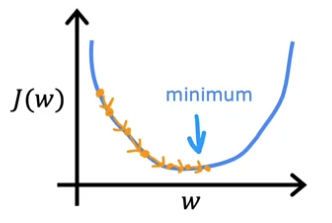
- If $\alpha$ is too large, gradient descent might not work --- the algorithm
might not converge to a local minimum.

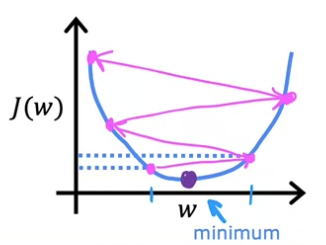
- Gradient descent can reach a local minimum even with a fixed learning rate,
because as the algorithm approaches a minimum, the derivatives become smaller
and smaller.

## Math!

### Review:
- Model: $f_{w,b}(x) = wx+b$

- Cost function:
$$J(w, b) = \frac{1}{2m} \sum_{i=1}^m \left( \hat{y}^{(i)} - y^{(i)} \right)^2$$

$$J(w, b) = \frac{1}{2m} \sum_{i=1}^m \left(f_{w,b}(x^{(i)})  - y^{(i)} \right)^2$$

**repeat until convergence** {
$$w = w - \alpha \cdot \frac{\partial}{\partial w} J(w, b)$$
$$b = b - \alpha \cdot \frac{\partial}{\partial b} J(w, b)$$
}

So we need to compute those partial derivatives!

### Derivations

\begin{align*}
\frac{\partial}{\partial w} J(w, b) 
 &= \frac{\partial}{\partial w} \frac{1}{2m} \sum_{i=1}^m \left(f_{w,b}(x^{(i)})  - y^{(i)} \right)^2 \\
 &= \frac{\partial}{\partial w} \frac{1}{2m} \sum_{i=1}^m \left(wx^{(i)}+b  - y^{(i)} \right)^2 \\
 &= \frac{1}{2m} \sum_{i=1}^m \left(\frac{\partial}{\partial w} \left( wx^{(i)}+b  - y^{(i)} \right)^2 \right) \\
 &= \frac{1}{2m} \sum_{i=1}^m \left( 2 \left( wx^{(i)}+b  - y^{(i)} \right)  \frac{\partial}{\partial w} \left( wx^{(i)}+b  - y^{(i)} \right) \right) \\
 &= \frac{1}{m} \sum_{i=1}^m \left( \left( wx^{(i)}+b  - y^{(i)} \right)  \frac{\partial}{\partial w} \left( wx^{(i)}+b  - y^{(i)} \right) \right) \\
 &= \frac{1}{m} \sum_{i=1}^m \left( \left( wx^{(i)}+b  - y^{(i)} \right)  x^{(i)} \right) \\
 &= \frac{1}{m} \sum_{i=1}^m  \left( f_{w,b}(x^{(i)}) - y^{(i)} \right)  x^{(i)} 
\end{align*}

\begin{align*}
\frac{\partial}{\partial b} J(w, b) &= \frac{\partial}{\partial b} J(w, b) \\
 &= \frac{\partial}{\partial b} \frac{1}{2m} \sum_{i=1}^m \left(f_{w,b}(x^{(i)})  - y^{(i)} \right)^2 \\
 &= \frac{\partial}{\partial b} \frac{1}{2m} \sum_{i=1}^m \left(wx^{(i)}+b  - y^{(i)} \right)^2 \\
 &= \frac{1}{2m} \sum_{i=1}^m \left(\frac{\partial}{\partial b} \left( wx^{(i)}+b  - y^{(i)} \right)^2 \right) \\
 &= \frac{1}{2m} \sum_{i=1}^m \left( 2 \left( wx^{(i)}+b  - y^{(i)} \right)  \frac{\partial}{\partial b} \left( wx^{(i)}+b  - y^{(i)} \right) \right) \\
 &= \frac{1}{m} \sum_{i=1}^m \left( \left( wx^{(i)}+b  - y^{(i)} \right)  \frac{\partial}{\partial b} \left( wx^{(i)}+b  - y^{(i)} \right) \right) \\
 &= \frac{1}{m} \sum_{i=1}^m \left( \left( wx^{(i)}+b  - y^{(i)} \right)  1 \right) \\
 &= \frac{1}{m} \sum_{i=1}^m  \left( f_{w,b}(x^{(i)}) - y^{(i)} \right)   
\end{align*}

## Final gradient descent algorithm for linear regression

initialize $w$ and $b$ to initial guesses.

**repeat until convergence** {
$$w = w - \alpha  \frac{1}{m} \sum_{i=1}^m  \left( f_{w,b}(x^{(i)}) - y^{(i)} \right)  x^{(i)}$$
$$b = b - \alpha  \frac{1}{m} \sum_{i=1}^m  \left( f_{w,b}(x^{(i)}) - y^{(i)} \right)  $$
}